# Лабораторные работы по дисциплине "Методы, средства и технологии мультимедиа"

**Выполнила студентка гр. М8О-406Б-21 Волошинская Евгения Владимировна**

В качестве данных я выбрала датасет Loan Approval Classification Dataset (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data). Эти данные могут быть использованы для обучения моделей ИИ, которые автоматизируют процесс одобрения кредитов, оценивают кредитный риск, выявляют важные факторы при принятии решений, обнаруживают потенциальное мошенничество и персонализируют кредитные предложения. Это помогает финансовым учреждениям повысить эффективность, уменьшить ручную работу, принимать более обоснованные решения при обработке кредитных заявок и улучшать клиентский опыт.

Данные подходят как для задачи классификации, так и для регрессии.

Для задачи классификации (предсказание одобрения займа): т.к. классы не сбалансированы, то основные метрики качества для сравнения моделей - Precision, Recall, F1-мера, но также рассчитаны и точность, и матрица ошибок, полнота и AUC.

Для задачи регрессии (расчет процентной ставки по займу):
MSE, MAE, MAPE и R2

## Лабораторная работа №4: Проведение исследований со случайным лесом

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


###Классификация

####Бейзлайн

In [ ]:
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy : 92.26666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10493
           1       0.90      0.73      0.81      3007

    accuracy                           0.92     13500
   macro avg       0.92      0.85      0.88     13500
weighted avg       0.92      0.92      0.92     13500



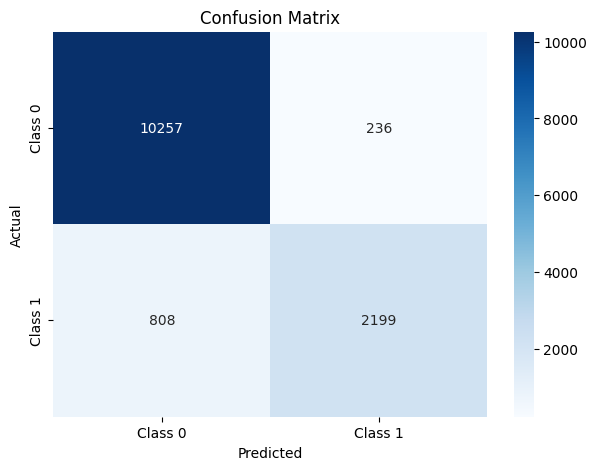

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

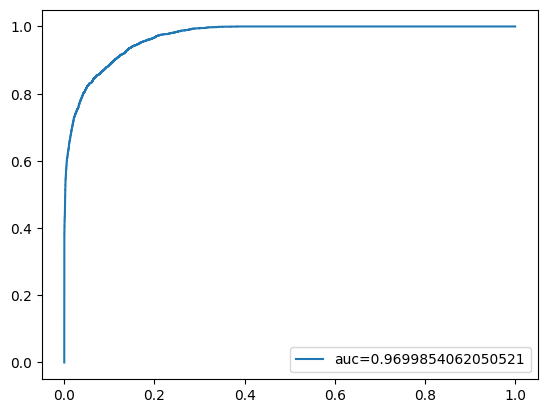

In [ ]:
# ROC curve
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Улучшенный бейзлайн

Гипотеза 1. Сбалансируем класс с помощью SMOTE для улучшения точности на несбалансированных данных

Гипотеза 2. Используем GridSearchCV для подбора гиперпараметров модели

Гипотеза 3. Добавим расчет F1-метрики для более точной оценки модели при несбалансированных классах

In [2]:
df = pd.read_csv("loan_data.csv")
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

In [3]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_distributions=param_distributions,
                           cv=StratifiedKFold(n_splits=5),
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
rf = grid_search.best_estimator_

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}


Accuracy : 91.16296296296296
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10493
           1       0.77      0.86      0.81      3007

    accuracy                           0.91     13500
   macro avg       0.86      0.89      0.88     13500
weighted avg       0.92      0.91      0.91     13500



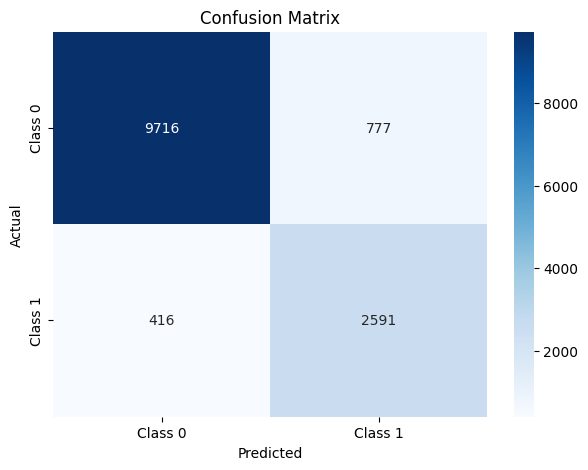

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

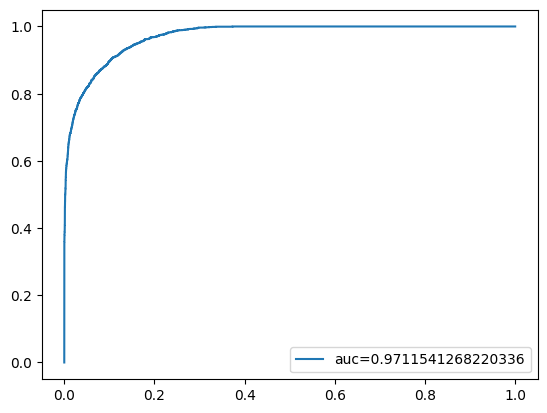

In [ ]:
# ROC curve
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

####Вывод:
Для задачи классификации улучшение бейзлайна не дало значительных улучшений при использовании RandomizedSearchCV. GridSearchCV оказался слишком долгим.

###Регрессия

####Baseline

In [4]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

Оценим качество модели по метрикам для регрессии:

In [6]:
features = X_test
y_pred = rf_regressor.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.28520349733015
Mean Absolute Error: 2.190442238915764
Mean Absolute Percentage Error (%): 0.22393738724680026
R² Score: 0.17116681047307003


####Улучшение baseline

Гипотеза 1. Используем GridSearchCV для поиска оптимальных гиперпараметров модели случайного леса

Гипотеза 2. Увеличим возможные значения параметров, таких как: n_estimators, max_depth, min_samples_split, min_samples_leaf.

In [7]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
rf_regressor = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_distributions, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.133064173568421
Mean Absolute Error: 2.1629288574845518
Mean Absolute Percentage Error (%): 0.22120040758832027
R² Score: 0.18847560919257267


####Вывод
Улучшенный бейзлайн дал повышение точности для задачи регрессии на метрике r2

###Самостоятельно имплементированные модели

####Классификация

#####Baseline

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
        """
        Инициализация дерева решений.

        :param max_depth: Максимальная глубина дерева.
        :param min_samples_split: Минимальное количество образцов для разделения.
        :param max_features: Максимальное количество признаков для рассмотрения.
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        """
        Обучение дерева решений.

        :param X: Матрица признаков (numpy array или pandas DataFrame).
        :param y: Вектор целевых переменных (numpy array или pandas Series).
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Построение дерева решений.

        :param X: Матрица признаков.
        :param y: Вектор целевых переменных.
        :param depth: Текущая глубина дерева.
        :return: Дерево решений.
        """
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or (self.max_depth and depth == self.max_depth) or n_samples < self.min_samples_split:
            return unique_classes[0]

        if self.max_features:
            features = np.random.choice(n_features, self.max_features, replace=False)
        else:
            features = range(n_features)

        best_gini = float('inf')
        best_split = None
        best_left_y, best_right_y = None, None
        best_left_X, best_right_X = None, None

        for feature in features:
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                left_X = X[left_mask]
                right_X = X[right_mask]

                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue

                gini = self._gini_impurity(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature, threshold)
                    best_left_y, best_right_y = left_y, right_y
                    best_left_X, best_right_X = left_X, right_X

        if best_split is None:
            return np.random.choice(unique_classes)

        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return {'feature': best_split[0], 'threshold': best_split[1], 'left': left_tree, 'right': right_tree}

    def _gini_impurity(self, left_y, right_y):
        """
        Расчет коэффициента Джини.

        :param left_y: Левая часть вектора целевых переменных.
        :param right_y: Правая часть вектора целевых переменных.
        :return: Коэффициент Джини.
        """
        left_size, right_size = len(left_y), len(right_y)
        total_size = left_size + right_size

        left_prob = np.sum(left_y == 1) / left_size if left_size > 0 else 0
        right_prob = np.sum(right_y == 1) / right_size if right_size > 0 else 0

        left_gini = 1 - left_prob**2 - (1 - left_prob)**2
        right_gini = 1 - right_prob**2 - (1 - right_prob)**2

        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        """
        Предсказание целевых переменных.

        :param X: Матрица признаков (numpy array или pandas DataFrame).
        :return: Вектор предсказанных целевых переменных.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values

        return [self._predict_sample(sample, self.tree) for sample in X]

    def _predict_sample(self, sample, tree):
        """
        Предсказание целевой переменной для одного образца.

        :param sample: Образец.
        :param tree: Дерево решений.
        :return: Предсказанная целевая переменная.
        """
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree


class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        """
        Инициализация случайного леса.

        :param n_estimators: Количество деревьев в лесу.
        :param max_depth: Максимальная глубина дерева.
        :param min_samples_split: Минимальное количество образцов для разделения.
        :param max_features: Максимальное количество признаков для рассмотрения.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        """
        Обучение случайного леса.

        :param X: Матрица признаков (numpy array или pandas DataFrame).
        :param y: Вектор целевых переменных (numpy array или pandas Series).
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        n_samples = X.shape[0]

        if isinstance(self.max_features, str) and self.max_features == 'sqrt':
            self.max_features = int(np.sqrt(X.shape[1]))

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = DecisionTree(self.max_depth, self.min_samples_split, self.max_features)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Предсказание целевых переменных.

        :param X: Матрица признаков (numpy array или pandas DataFrame).
        :return: Вектор предсказанных целевых переменных.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = np.array([tree.predict(X) for tree in self.trees])
        return [np.bincount(prediction).argmax() for prediction in predictions.T]

In [ ]:
df = pd.read_csv("loan_data.csv")
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForest(n_estimators=40, max_depth=10, max_features='sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy : 84.11111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     10493
           1       1.00      0.29      0.45      3007

    accuracy                           0.84     13500
   macro avg       0.92      0.64      0.68     13500
weighted avg       0.87      0.84      0.80     13500



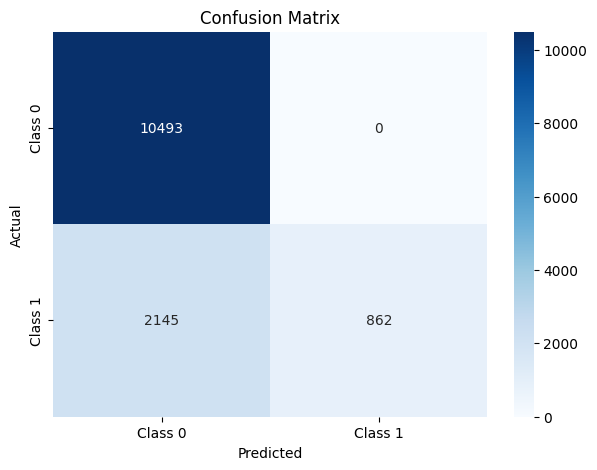

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

####Улучшенный бейзлайн

In [25]:
class OptimizedDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or (self.max_depth and depth == self.max_depth) or n_samples < self.min_samples_split:
            return unique_classes[0]

        if self.max_features:
            features = np.random.choice(n_features, self.max_features, replace=False)
        else:
            features = range(n_features)

        best_gini = float('inf')
        best_split = None
        best_left_y, best_right_y = None, None
        best_left_X, best_right_X = None, None

        for feature in features:
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue

                gini = self._gini_impurity(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature, threshold)
                    best_left_y, best_right_y = left_y, right_y
                    best_left_X, best_right_X = X[left_mask], X[right_mask]

        if best_split is None:
            return np.random.choice(unique_classes)

        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return {'feature': best_split[0], 'threshold': best_split[1], 'left': left_tree, 'right': right_tree}

    def _gini_impurity(self, left_y, right_y):
        left_size, right_size = len(left_y), len(right_y)
        total_size = left_size + right_size

        left_prob = np.sum(left_y == 1) / left_size if left_size > 0 else 0
        right_prob = np.sum(right_y == 1) / right_size if right_size > 0 else 0

        left_gini = 1 - left_prob**2 - (1 - left_prob)**2
        right_gini = 1 - right_prob**2 - (1 - right_prob)**2

        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        return [self._predict_sample(sample, self.tree) for sample in X]

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'max_features': self.max_features
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

class OptimizedRandomForest:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'max_features': self.max_features
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = OptimizedDecisionTree(self.max_depth, self.min_samples_split, self.max_features)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return [np.bincount(prediction).argmax() for prediction in predictions.T]

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

In [26]:
df = pd.read_csv("loan_data.csv")
target = 'loan_status'
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=[target])
y = df[target]

In [27]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [28]:
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_distributions = {
    'n_estimators': [30, 60],
    'max_depth': [10, 15, None],
    'max_features': ['sqrt', 'log2', None]
}

rf = OptimizedRandomForest()
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train_balanced)

print(f"Best parameters: {grid_search.best_params_}")

y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9075555555555556
Confusion Matrix:
[[10110   383]
 [  865  2142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10493
           1       0.85      0.71      0.77      3007

    accuracy                           0.91     13500
   macro avg       0.88      0.84      0.86     13500
weighted avg       0.90      0.91      0.90     13500

ROC AUC: 0.8383678022350783


####Регрессия

#####Baseline

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape

        if len(set(y)) == 1 or (self.max_depth is not None and depth == self.max_depth) or n_samples < self.min_samples_split:
            return np.mean(y)

        best_mse = float('inf')
        best_split = None
        best_left_y, best_right_y = None, None
        best_left_X, best_right_X = None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue

                mse = self._mean_squared_error(left_y, right_y)
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature, threshold)
                    best_left_y, best_right_y = left_y, right_y
                    best_left_X, best_right_X = X[left_mask], X[right_mask]

        if best_split is None:
            return np.mean(y)

        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return {'feature': best_split[0], 'threshold': best_split[1], 'left': left_tree, 'right': right_tree}

    def _mean_squared_error(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2) if len(left_y) > 0 else 0
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2) if len(right_y) > 0 else 0
        return left_mse * (len(left_y) / (len(left_y) + len(right_y))) + right_mse * (len(right_y) / (len(left_y) + len(right_y)))

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        return [self._predict_sample(sample, self.tree) for sample in X]

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)

In [ ]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=40, max_depth=10, min_samples_split=5)
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.1637828956266263
Mean Absolute Error: 2.1649020147428160
Mean Absolute Percentage Error (%): 0.22194712820418467
R² Score: 0.1825384921831839


#####Улучшенный бейзлайн

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape

        if len(set(y)) == 1 or (self.max_depth is not None and depth == self.max_depth) or n_samples < self.min_samples_split:
            return np.mean(y)

        best_mse = float('inf')
        best_split = None
        best_left_y, best_right_y = None, None
        best_left_X, best_right_X = None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue

                mse = self._mean_squared_error(left_y, right_y)
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature, threshold)
                    best_left_y, best_right_y = left_y, right_y
                    best_left_X, best_right_X = X[left_mask], X[right_mask]

        if best_split is None:
            return np.mean(y)

        left_tree = self._build_tree(best_left_X, best_left_y, depth + 1)
        right_tree = self._build_tree(best_right_X, best_right_y, depth + 1)

        return {'feature': best_split[0], 'threshold': best_split[1], 'left': left_tree, 'right': right_tree}

    def _mean_squared_error(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2) if len(left_y) > 0 else 0
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2) if len(right_y) > 0 else 0
        return left_mse * (len(left_y) / (len(left_y) + len(right_y))) + right_mse * (len(right_y) / (len(left_y) + len(right_y)))

    def predict(self, X):
        return [self._predict_sample(sample, self.tree) for sample in X]

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['threshold']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

class RandomForestRegressor:
    def __init__(self, n_estimators=40, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y.iloc[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=30, max_depth=7, min_samples_split=5)
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

#####Вывод:
Самостоятельно имплементированные модели обучались очень долго, и получились неоптимальными. Стоило уменьшить количество переменных в модели, исключив наименее важные, чтобы повысить скорость обучения.

RandomForest - самый медленный алгоритм из всех исследуемых.